 Israel Elections Data Analysis

In [ ]:
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')
    
if run_in_colab:
    from google.colab import files
    uploaded = files.upload() 


In [ ]:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload() 

In [ ]:
# Import modules 
import sys
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

In [ ]:
# using the lecture code
import io

data_type = "city"
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) 
        df_2021 = df_2021[df_2021.columns[8:-1]] 
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) 
        df_2021 = df_2021[df_2021.columns[5:-1]] 

# Create a dictionary mapping parties names to voting letters
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


In [ ]:
# using the lecture code
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
#print("{} votes in March 2021".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות')

In [ ]:
# using the lecture code

df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()
#df_2021[1:4]


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_2021_new = df_2021.rename(columns={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"})


## Question 1: ##

##a##

In [ ]:
# Show party votes for two parties
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

def two_parties_scatter(df, party1, party2):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city

    fig, ax = plt.subplots(figsize=(10,9))
    width = 0.3

    bazab = df_2021_raw['בזב']
    # בעלי זכות בחירה
    s = [i/bazab.max()*200 for i in bazab]

    # s=s as required in innstructions
    plt.scatter(party_share1, party_share2, s = s, alpha = 0.8, color = 'darkred')  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter plot of two parties - 2021 ' )
    plt.show()

    return fig, ax




In [ ]:
#Checking the funciton
#two_parties_scatter( df_2021_new,'הליכוד','יש עתיד')
# As done in lecture

##b##

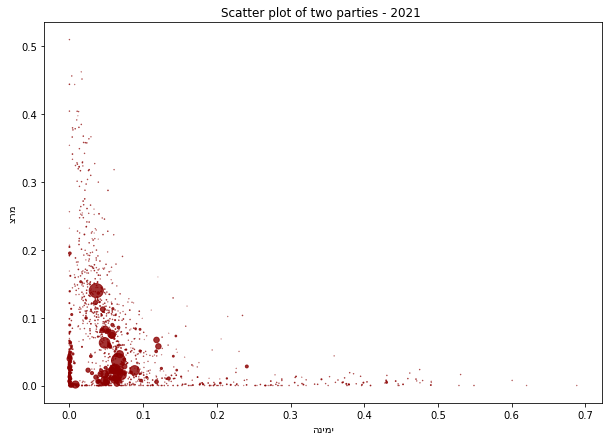

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50a5f78990>)

In [ ]:
two_parties_scatter( df_2021_new, 'ימינה','מרצ')


It seem that there is strong dependency negative connection between Yamina and Meretz. Voting precentage among the suffragiums overall towns to these 2 parties are from differnt places and political map.












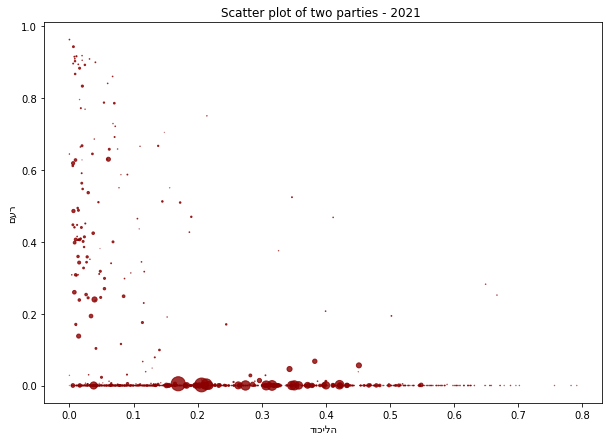

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50a5f5ff90>)

In [ ]:
two_parties_scatter( df_2021_new, 'הליכוד','רעם')

It seem that there is weak and almost in-dependency negative connection between Licud and Raam-Taal. The same as the previos plot, the voting precentage among the suffragiums overall towns to these 2 parties are from differnt places and political map.
.

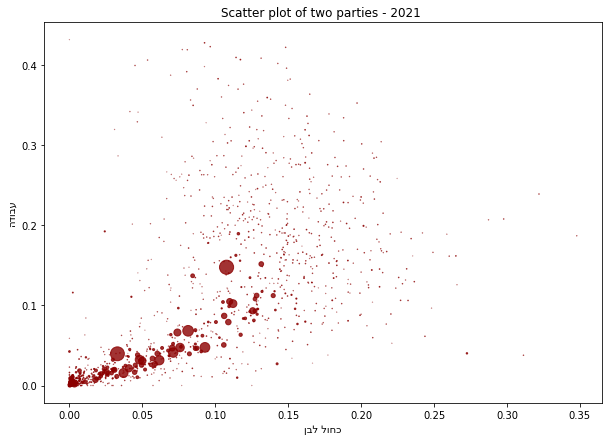

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50a5e0f210>)

In [ ]:
two_parties_scatter( df_2021_new, 'כחול לבן','עבודה')

It seem that there is strong and dependency positive connection between Avoda and Kachol Lavan. The voting precentage among the suffragiums overall towns to these 2 parties are from same places and similar political map.




##Question 2:##

In [ ]:
# names - vector with parties' names
def parties_above_blocking_precentage(df, threshold):
  precent = df.sum().div(df.sum().sum()).sort_values(ascending = False)
  return precent [precent > threshold]

names = ['הליכוד','יש עתיד','שס','כחול לבן','ימינה','עבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','הרשימה המשותפת','תקוה חדשה','מרצ','רעם']

In [ ]:
# corr_mat - matrix of correlations
from scipy import stats
corr_mat = df_2021_new[names].div(df_2021_raw['כשרים'], axis = "rows")
corr_mat = corr_mat.corr()
corr_mat.head()

,הליכוד,יש עתיד,שס,כחול לבן,ימינה,עבודה,יהדות התורה,ישראל ביתנו,הציונות הדתית,הרשימה המשותפת,תקוה חדשה,מרצ,רעם
הליכוד,1.000000,-0.319365,0.500381,-0.238366,0.089195,-0.473516,-0.071666,0.013617,0.005176,-0.242538,0.222942,-0.479309,-0.242189
יש עתיד,-0.319365,1.000000,-0.410306,0.789845,-0.294935,0.687355,-0.193398,0.197176,-0.469679,-0.339482,0.366471,0.508047,-0.368925
שס,0.500381,-0.410306,1.000000,-0.354232,-0.035730,-0.401039,0.313636,-0.071463,0.106297,-0.112874,-0.131399,-0.356850,-0.126526
כחול לבן,-0.238366,0.789845,-0.354232,1.000000,-0.221969,0.637636,-0.196983,0.133326,-0.438965,-0.357464,0.358730,0.426140,-0.381661
ימינה,0.089195,-0.294935,-0.035730,-0.221969,1.000000,-0.295544,-0.049970,-0.149109,0.492865,-0.238094,0.176137,-0.348872,-0.243794


In [ ]:
# heatmap for the correlation matrix

def heatmap_corr(corr_matrix, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(corr_matrix, cmap=plt.get_cmap('viridis'))
    n = corr_matrix.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    plt.xticks(rotation=90)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

##a - Party correlation by size##








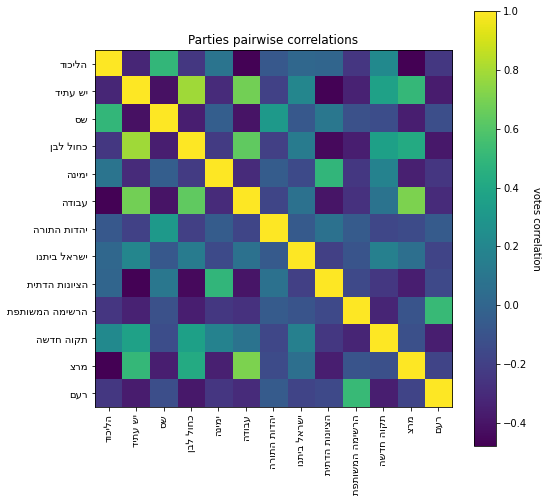

In [ ]:
heatmap_corr(corr_mat, names)

Because the vote was close and because the parties are arranged by size, you would expect some sort of alternating pattern of correlations, creating a checkerboard effect. If the two or three biggest parties all belonged to one side of the political spectrum, they would have won. This gragh allines with this theory and demonstrates it.

##b - party correlation by political affiliation

There are many criteria used to define political right and left, including social/individual rights, economic policy, religion, culture, nationalism, etc. The relevant criteria are typically the social issues in the country and era of observasion. For the purpose of this exercise we used a combination of nationalism/zionism and traditional culture, which seem to be the "hottest" topics on the social agenda.

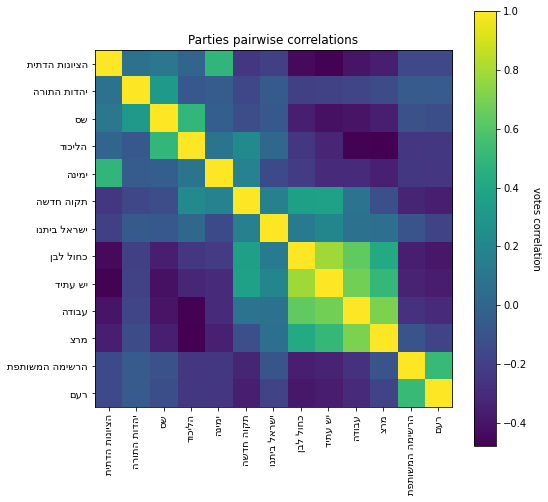

In [ ]:
names_politics = ['הציונות הדתית','יהדות התורה','שס','הליכוד','ימינה','תקוה חדשה','ישראל ביתנו','כחול לבן','יש עתיד','עבודה','מרצ','הרשימה המשותפת','רעם']

corr_matrix_parties = df_2021_new[names_politics].div(df_2021_raw['כשרים'], axis = "rows")
corr_matrix_parties = corr_matrix_parties.corr()
heatmap_corr(corr_matrix_parties, names_politics)

We see a block on the center-left of the political spectrum, unlike on the right. We suggest two possible explanations.Firstly, lower correlation figures among various far-right parties indicate voters living in specific and homogenously grouped cities, while higher correlation figures among various centre-left parties seem to indicate a more even spread of their voters among heterogenously inhabited cities. Secondly, the center-left party platforms might be less defined than the extreme right parties' platforms, and target the same population as each other.

This heatmap is more informative than the previous one. When analyzing voting percentages of political parties, their political relationships are more significant than their size ratios.

##Question 3:##

##a- city data

In [ ]:
# First we fixed the data per city to 100 percent vote. 
vo = df_2021_raw['כשרים'].div(df_2021_raw['בזב'])
fixed_df = df_2021.div(vo , axis = 'rows')

In [ ]:
# We created a function that compare between the fixed data to the original data. 
def fixed_votes_against_original(dfA, dfB, threshold):
  origV = parties_above_blocking_precentage(dfA, threshold)
  n = len(origV)
  width = 0.3
  parties = origV.keys()

  fixedV = parties_above_blocking_precentage(dfB, threshold)

  r_names = [name[::-1] for name in list(parties)]

  fig, ax = plt.subplots(figsize=(8,8))

  original_bar = ax.bar(np.arange(n), list(origV), width, color = 'orange')
  fixed_bar = ax.bar(np.arange(n)+width, list(fixedV), width, color = 'lightblue')

  ax.set_xlabel = 'Parties names'
  ax.set_ylabel = 'Vote percent'
  ax.set_title = 'Fixed vote percent against original vote percent per party'
  ax.set_xticks(np.arange(n))
  ax.set_xticklabels(r_names)
  ax.legend((original_bar[0], fixed_bar[0]), ('original Data', 'fixed Data'))
  plt.xticks(rotation=90)
  plt.show()

  return fig, ax

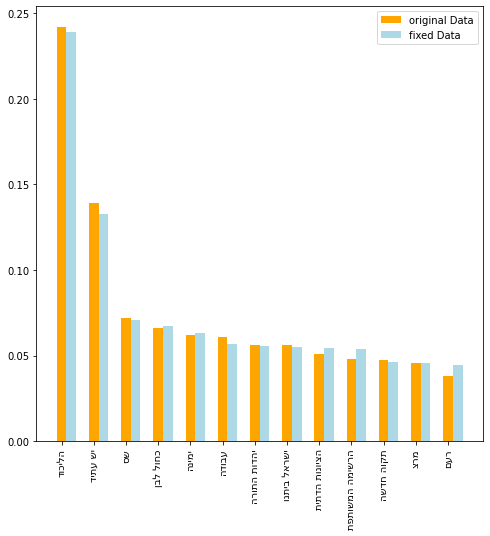

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50a5d28e90>)

In [ ]:

fixed_votes_against_original(df_2021_new, fixed_df, 0.0325)

##b- ballot data

In [ ]:
#upload the ballot file
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')
    
if run_in_colab:
    from google.colab import files
    uploaded = files.upload() 

Running on CoLab


Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv


In [ ]:
df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) 
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[9:]] 

df_2021_ballots_new = df_2021_ballots.rename(columns={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"})


In [ ]:
# We fixed the data per ballot to 100 percent vote.
vo = df_2021_ballots_raw['כשרים'].div(df_2021_ballots_raw['בזב'])
fixed_df_b = df_2021_ballots.div(vo , axis = 'rows')


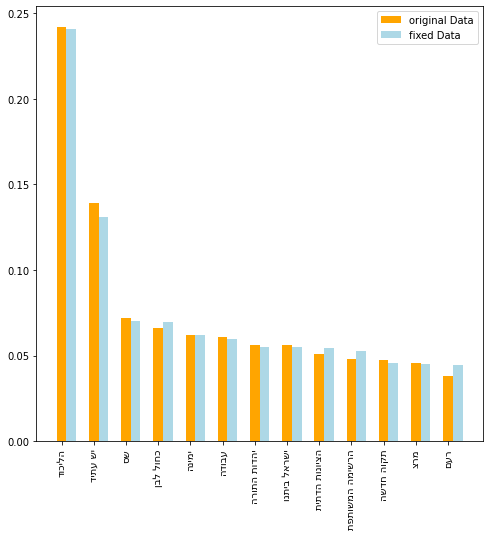

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50a5b66610>)

In [ ]:
fixed_votes_against_original(df_2021_ballots_new, fixed_df_b, 0.035)

It seems like the results between the information by cities and the information by ballots do not seem to change. We can learn from this that in a state of voting in one hundred percent the distribution by both city and by ballot remains true to the original state which is a partial vote.